In [1]:
# Parameters
MSA_MARKET = "San Francisco"
BRAND_MSA = "San Francisco-Oakland-San Jose, CA"


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [3]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9owFIX%2FSuQ9J3YCCcUCKgZj0LGBgKJtb45tqCGxma%2FTtPv1M6FInaZW2pt1fY793Xvs3u1TWQSP0oIyuo%2FiiKBAam6E0vs%2But9MwhsUgGNasMJo2UfPEtDtoAesLE50WLkHvZK%2FKgku8AdpoM1GH1VWU8NAAdWslEAdp%2Bvh1zlNIkJP1jjDTYFeWd53MABpnSe8WgQoj%2Ffg3IliXNd1VLciY%2Fc4IYRg0sVedZZ8uOqffE9v6GNM2me9V3j58oXto9KXEbyHlV9EQKebzTJcLtYbFAyvqCOjoSqlXUv7qLi8X80vAOAJDhW42tgjhCVTOgJt6l3BjpKb8lQ5f2TkV3gnBS7MXvmuZ%2BM%2BOh2V2B66Kl92p%2FVis5iP74ar8acvc06mo%2B%2FFj70U9QRgK%2B4Ov8nne46C7TXW5BzrDKCSM30O0%2FkSSdphHIdJsiGEpi2aZNFNHP9EwdiHqTRzjfMf4ogXphKe1krGuQRoULnQId8rfClhAIPPqWLRaeecZDlnKct3WZZ1OizOWBzLLGmlskN2hPFOuiOynSWcC8m6nTzNeZ5ylne7LXR5abRht4P%2

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,0066S000011AVXUQA4,0016S000035r3tSQAQ,0016S000035r3tSQAQ,None,None,None,21015,20224,2022-04-25,4,...,Include,Self Service,None,None,None,None,None,None,None,None
1,0066S000013Z691QAC,0016S00003BJJNTQA5,0016S00003BJJNTQA5,Boston,MA,None,02114,20231,2022-08-29,1,...,Include,MRA,None,None,None,None,None,None,None,None
2,006PJ000006yVdNYAU,001PJ000007AS9NYAW,001PJ000007AS9NYAW,None,None,None,01983,20243,2024-02-12,3,...,Include,Self Service,None,None,None,None,None,None,None,None
3,006PJ000001nD5CYAU,001PJ000001srwQYAQ,001PJ000001srwQYAQ,None,None,None,11211,20242,2023-09-04,2,...,Include,Self Service,None,None,None,None,None,None,None,None
4,0066S0000119pGwQAI,0016S000035qD1JQAU,0016S000035qD1JQAU,NORTH LAS VEGAS,NV,United States,89084,20224,2022-04-04,4,...,Include,Self Service,None,None,None,None,None,None,None,None


In [4]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNdb9owFIb%2FSuRdJ3ZCPoYFVKyoKhVbEaRc7M6xneCR2KntNLBfP4cPqdPUSruLTt7j5z3ntSd3x6b23rg2QskpCAMEPC6pYkJWU%2FCSP%2FhfgWcskYzUSvIpOHED7mYTQ5q6xfPO7uWGv3bcWM8dJA0efkxBpyVWxAiDJWm4wZbi7fz7CkcBwsQYrq3DgWsLM8Kx9ta2GMK%2B74N%2BFChdwQghBNEYOtUg%2BQLeIdrPGa1WVlFV31qObqYPECFE8YBwCkdYXxu%2FCXlZwWeU4iIy%2BDHP1%2F76eZsDb36b7l5J0zVcb7l%2BE5S%2FbFYXA8Y5%2BNUZ2yt9MH5DhAyMVH1ZkwOnqmk7644M3BcsOYO1qoRb1HIxBe1BsNeuOa2PllVF8ls%2F7jYrmuU7KRZJ2Cf0eT96OhGajtKnSh4o8Ha3WKMh1qUxHV%2FKIUzrSiiK%2FTD0oyhHCCcxRuMAZfFP4C1cmEISe%2B78x3FAa9Ux51ZzQik35myVMunTSsBLCRqj4JASZFlcUJQWlCSkKNM0zTISpiQMeRqNEp6hEhGaJSXicRpRyjgZZ0VS0CKhpBiPR%2BBy0%2FD

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [6]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [7]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26818
42491
25757
loss is 0.03956298008800063


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,0066S000011AVXUQA4,0016S000035r3tSQAQ,0016S000035r3tSQAQ,None,None,None,21015,20224,2022-04-25,4,...,None,None,None,None,21015,Maryland,MD,"Baltimore-Towson, MD MSA",12580.0,DC Metro
1,0066S000013Z691QAC,0016S00003BJJNTQA5,0016S00003BJJNTQA5,Boston,MA,None,02114,20231,2022-08-29,1,...,None,None,None,None,02114,Massachusetts,MA,"Boston-Cambridge-Quincy, MA-NH MSA",14460.0,New England
2,006PJ000006yVdNYAU,001PJ000007AS9NYAW,001PJ000007AS9NYAW,None,None,None,01983,20243,2024-02-12,3,...,None,None,None,None,01983,Massachusetts,MA,"Boston-Cambridge-Quincy, MA-NH MSA",14460.0,New England
3,006PJ000001nD5CYAU,001PJ000001srwQYAQ,001PJ000001srwQYAQ,None,None,None,11211,20242,2023-09-04,2,...,None,None,None,None,11211,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro
4,0066S0000119pGwQAI,0016S000035qD1JQAU,0016S000035qD1JQAU,NORTH LAS VEGAS,NV,United States,89084,20224,2022-04-04,4,...,None,None,None,None,89084,Nevada,NV,"Las Vegas-Paradise, NV MSA",29820.0,Rest of Country


In [8]:
#from datetime import date

# today = date.today()

# # Convert to datetime and round to the start of the month
# today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
# end_date = today_month_start.strftime('%Y-%m-%d')

# print(end_date)

In [9]:
merged_df['IO_DATE']

0       2022-04-26
1       2022-08-31
2       2024-02-15
3       2023-09-08
4       2022-04-04
           ...    
25752   2023-02-13
25753   2024-09-06
25754   2023-03-14
25755   2023-02-17
25756   2023-05-08
Name: IO_DATE, Length: 25757, dtype: datetime64[ns]

In [10]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
#import datetime
#merged_df["IO_DATE"] = pd.to_datetime(merged_df["IO_DATE"], errors="coerce")
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period('M')
# Convert to datetime and round to the start of the month
#merged_df['check'] = merged_df["year_month"].to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
#end_date = today_month_start.strftime('%Y-%m-%d')

#merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M").to_timestamp()
print(merged_df["IO_DATE"])

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

0       2022-04-26
1       2022-08-31
2       2024-02-15
3       2023-09-08
4       2022-04-04
           ...    
25752   2023-02-13
25753   2024-09-06
25754   2023-03-14
25755   2023-02-17
25756   2023-05-08
Name: IO_DATE, Length: 25757, dtype: datetime64[ns]


In [12]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [13]:
#Define Parameters


# MSA_MARKET = "New York"
# #STATE = "New York"
# BRAND_MSA = "New York, NY"

# BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
#                   "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# # Used as contains filter 
# MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is California
2024-09-01


In [14]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
13,2021-06,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
137,2021-07,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
275,2021-08,California,CA,"San Francisco-Oakland-Fremont, CA MSA",30
390,2021-09,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
509,2021-10,California,CA,"San Francisco-Oakland-Fremont, CA MSA",23


In [15]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
city_monthly_data.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
13,2021-06-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
137,2021-07-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
275,2021-08-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",30
390,2021-09-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
509,2021-10-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",23


In [16]:

#from datetime import date



print(intervention_date)

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < intervention_date
][["year_month", "io_count"]]

today = dt.date.today()

# # Convert to datetime and round to the start of the month
today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
treatment_end_date = today_month_start.strftime('%Y-%m-%d')

print(treatment_end_date)


marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= intervention_date) & (city_monthly_data["year_month"]
    < treatment_end_date)
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

2024-09-01
2024-11-01


,year_month,io_count
13,2021-06-01,27
137,2021-07-01,27
275,2021-08-01,30
390,2021-09-01,27
509,2021-10-01,23


In [17]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_5435/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,27
2021-07-01,27
2021-08-01,30
2021-09-01,27
2021-10-01,23


In [18]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [19]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [20]:
data.head()

,year_month,io_count,intervention,t,month
13,2021-06-01,27,False,0,6
137,2021-07-01,27,False,1,7
275,2021-08-01,30,False,2,8
390,2021-09-01,27,False,3,9
509,2021-10-01,23,False,4,10


In [21]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,27,False,0,6
2021-07-01,27,False,1,7
2021-08-01,30,False,2,8
2021-09-01,27,False,3,9
2021-10-01,23,False,4,10


In [22]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,33,False,36,6
2024-07-01,38,False,37,7
2024-08-01,33,False,38,8
2024-09-01,35,True,39,9
2024-10-01,45,True,40,10


In [23]:
data_final.isna().sum()

io_count        0
intervention    0
t               0
month           0
dtype: int64

In [24]:
data_final.head()


,io_count,intervention,t,month
year_month,,,,
2021-06-01,27,False,0,6
2021-07-01,27,False,1,7
2021-08-01,30,False,2,8
2021-09-01,27,False,3,9
2021-10-01,23,False,4,10


In [25]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,33,False,36,6
2024-07-01,38,False,37,7
2024-08-01,33,False,38,8
2024-09-01,35,True,39,9
2024-10-01,45,True,40,10


In [26]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNdb9owFIb%2FSuRdJ3ZCPooFVBTEYOo6xEel7c5xDHVJ7MzHIeXfzxCQOk2ttLvo5D1%2B3nNee3D%2FVpXeURiQWg1RGBDkCcV1IdV%2BiLabmX%2BHPLBMFazUSgzRSQC6Hw2AVWVNx419USvxuxFgPXeQAnr%2BMUSNUVQzkEAVqwRQy%2Bl6%2FP2RRgGhDEAY63Do2lKAdKwXa2uKcdu2QdsLtNnjiBCCSR871VnyBb1D1J8zaqOt5rq8tby5mT5AhJjEZ4RTOMLy2vggVbeCzyh5JwI632yW%2FvLHeoO88W26iVbQVMKshTlKLrarx84AOAevDdhWmwP4FZMqAKXbXckOguuqbqw7MnBfeCcKXOq9dItaTIeoPsgiS4V%2B0JPes57wnmZzsf06r6vZOvn2FL%2F%2BBJkcozhPZHRaEY6851us0TnWBUAjFuocpnUlEsV%2BGPpRtCGEJjEN0yC9S38hb%2BrClIrZS%2Bc%2FjgNe6qZwbo1gnAuAi1VeKJ%2FvJe5KGEDjc0q4yOKckzTnLGH5Lk3TLGNhysJQpFEvERnZEcazZEdEnEacF4L1szzJeZ5wlvf7PdTdNHrxb

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
1583,San Francisco,California,United States,Direct,2022-03-01,236
4865,San Francisco,California,United States,Direct,2022-04-01,172
6464,San Francisco,California,United States,Direct,2022-05-01,120
8887,San Francisco,California,United States,Direct,2022-06-01,187
14170,San Francisco,California,United States,Direct,2022-07-01,4611


In [27]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query()

brand_search_df = brand_search_df[(brand_search_df['METRO'] == BRAND_MSA) & (brand_search_df['REGION'] == STATE)]

# Display the DataFrame
brand_search_df.head()

San Francisco
California
San Francisco-Oakland-San Jose, CA
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNdb9sgFIb%2FisWubbDjjwUlqbJGWSN1TZSk1bY7DDhhweABrpv%2B%2BuF8SJ2mVtqddfwenvecF0Y3L7UMnrmxQqsxiCMEAq6oZkLtxuBxOw8%2Fg8A6ohiRWvExOHILbiYjS2rZ4Gnr9mrNf7fcusAfpCzuf4xBaxTWxAqLFam5xY7izfTbPU4ihIm13DiPA5cWZoVn7Z1rMIRd10XdINJmBxOEEERD6FW95BN4g2g%2BZjRGO021vLa8%2BJneQcQQpT3CKzxhdWn8ItR5BR9RyrPI4rvtdhWulpstCKbX6W61sm3NzYabZ0H54%2Fr%2BbMB6B79a6zptDjasiVCRVbqrJDlwquumdf7IyH%2FBijMo9U74RS1mY9AcBEtL%2Frp%2B3S%2B%2BPs3uhSzm3eAHYUYuCblzWeKSwW7V5dnye3akFARP11iTPtaFtS1fqD5M50soScM4DpNkixDOUpxkEcrjnyCY%2BTCFIu7U%2BY%2FjiErdMu%2FWcEIpt%2FZklTIV0p2A5xK0VsM%2BJciKt

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
80,California,California,"San Francisco-Oakland-San Jose, CA",0.00,3,0,2024-08-01
100,California,California,"San Francisco-Oakland-San Jose, CA",2.13,4,2,2022-02-01
277,California,California,"San Francisco-Oakland-San Jose, CA",26.88,8,3,2022-11-01
360,California,California,"San Francisco-Oakland-San Jose, CA",7.38,3,1,2023-05-01
717,California,California,"San Francisco-Oakland-San Jose, CA",9.73,3,3,2024-04-01


In [28]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,27,False,0,6
2021-07-01,27,False,1,7
2021-08-01,30,False,2,8
2021-09-01,27,False,3,9
2021-10-01,23,False,4,10


In [29]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,27,False,0,6
1,2021-07-01,27,False,1,7
2,2021-08-01,30,False,2,8
3,2021-09-01,27,False,3,9
4,2021-10-01,23,False,4,10


In [30]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-03-01,30,False,9,3,San Francisco,California,United States,2022-03-01,236
1,2022-04-01,21,False,10,4,San Francisco,California,United States,2022-04-01,172
2,2022-05-01,20,False,11,5,San Francisco,California,United States,2022-05-01,120
3,2022-06-01,21,False,12,6,San Francisco,California,United States,2022-06-01,187
4,2022-07-01,19,False,13,7,San Francisco,California,United States,2022-07-01,4611


In [31]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-03-01,30,False,9,3,San Francisco,California,United States,2022-03-01,236,California,California,"San Francisco-Oakland-San Jose, CA",1.51,6,1,2022-03-01
1,2022-04-01,21,False,10,4,San Francisco,California,United States,2022-04-01,172,California,California,"San Francisco-Oakland-San Jose, CA",12.42,6,2,2022-04-01
2,2022-05-01,20,False,11,5,San Francisco,California,United States,2022-05-01,120,California,California,"San Francisco-Oakland-San Jose, CA",15.58,8,4,2022-05-01
3,2022-06-01,21,False,12,6,San Francisco,California,United States,2022-06-01,187,California,California,"San Francisco-Oakland-San Jose, CA",7.55,8,1,2022-06-01
4,2022-07-01,19,False,13,7,San Francisco,California,United States,2022-07-01,4611,California,California,"San Francisco-Oakland-San Jose, CA",0.00,2,0,2022-07-01


In [32]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,30,False,9,3,236,1.51,6,1
2022-04-01,21,False,10,4,172,12.42,6,2
2022-05-01,20,False,11,5,120,15.58,8,4
2022-06-01,21,False,12,6,187,7.55,8,1
2022-07-01,19,False,13,7,4611,0.00,2,0


In [33]:
df_final2['direct_search_sum'].describe()

count       31.000000
mean      8308.032258
std       3454.431362
min        120.000000
25%       8283.500000
50%       9455.000000
75%      10298.500000
max      12227.000000
Name: direct_search_sum, dtype: float64

In [34]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [35]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,30,False,9,3,236,1.51,6,1
2022-04-01,21,False,10,4,172,12.42,6,2
2022-05-01,20,False,11,5,120,15.58,8,4
2022-06-01,21,False,12,6,187,7.55,8,1
2022-07-01,19,False,13,7,4611,0.00,2,0


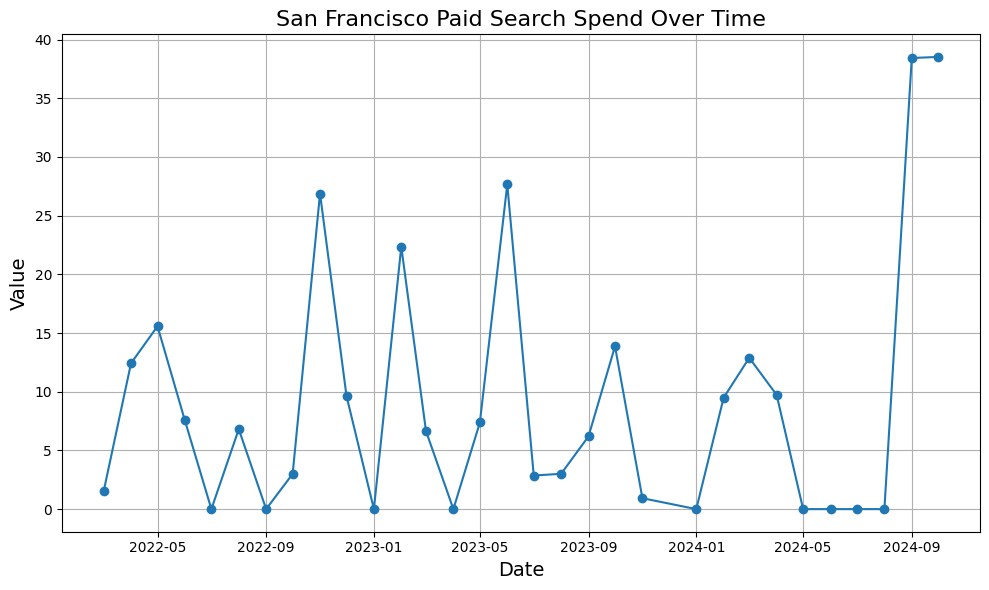

In [36]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title(f'{MSA_MARKET} Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(fname = f'{MSA_MARKET} Paid Search Over Time')
# Show the plot
plt.show()

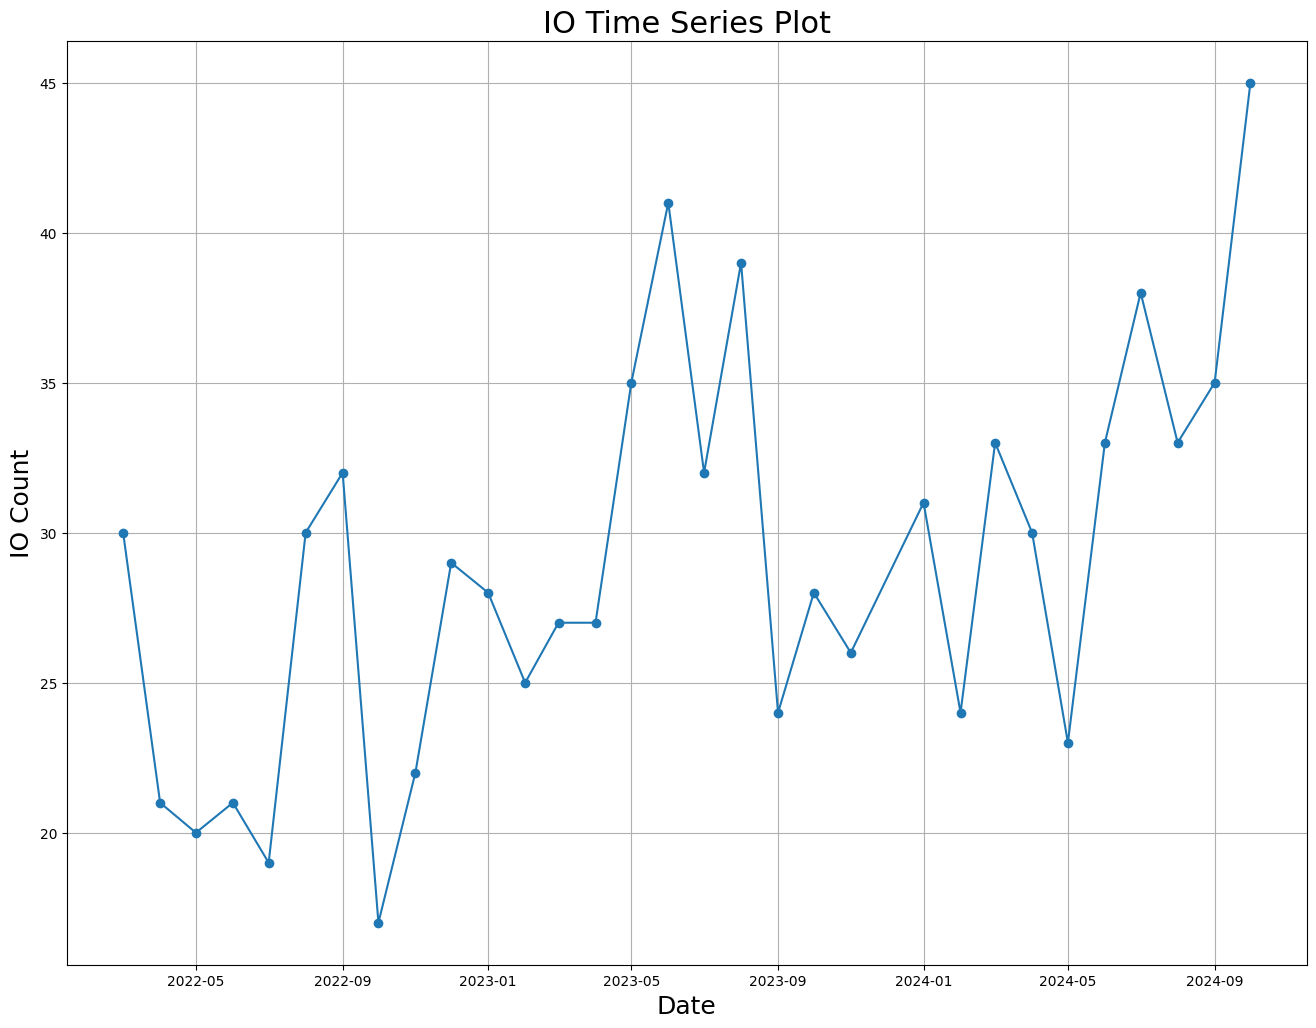

In [37]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.savefig(fname = f'{MSA_MARKET} IOs Over Time ')
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.8575676478327314
p-value: 0.050509487498544246


<Figure size 1000x600 with 0 Axes>

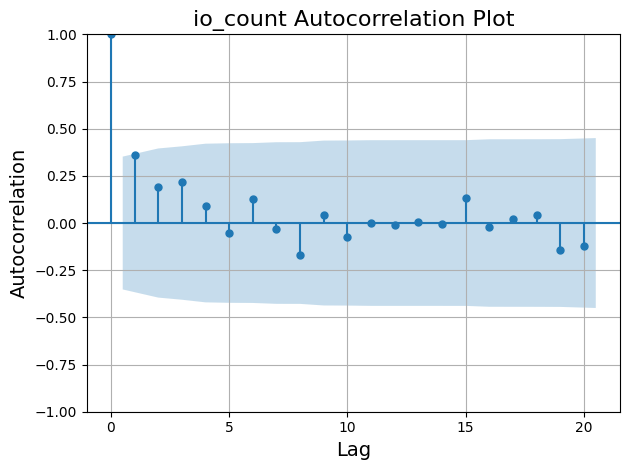

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

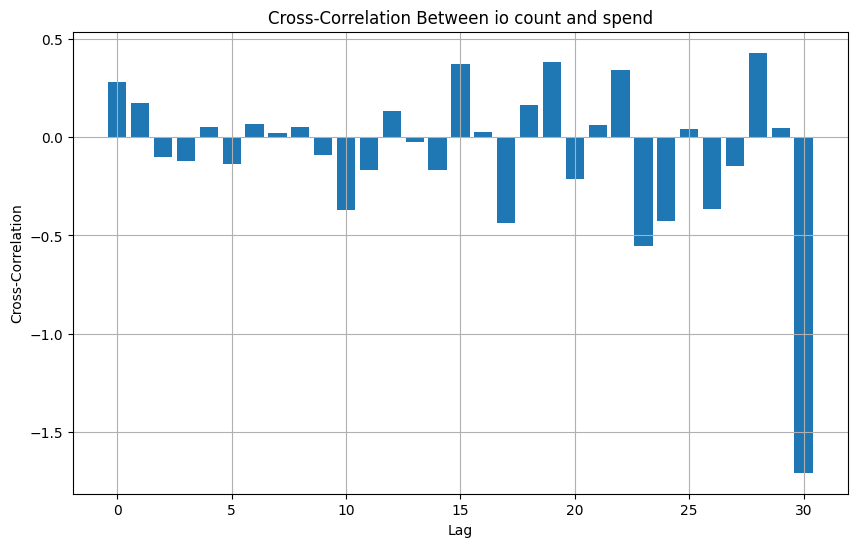

In [40]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [41]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,30,False,9,3,236,1.51,6,1
2022-04-01,21,False,10,4,172,12.42,6,2
2022-05-01,20,False,11,5,120,15.58,8,4
2022-06-01,21,False,12,6,187,7.55,8,1
2022-07-01,19,False,13,7,4611,0.00,2,0


In [42]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,21,False,10,4,172,12.42,6,2,1.51,236.0,6.0,30.0
2022-05-01,20,False,11,5,120,15.58,8,4,12.42,172.0,6.0,21.0
2022-06-01,21,False,12,6,187,7.55,8,1,15.58,120.0,8.0,20.0
2022-07-01,19,False,13,7,4611,0.00,2,0,7.55,187.0,8.0,21.0
2022-08-01,30,False,14,8,7628,6.81,3,1,0.00,4611.0,2.0,19.0


In [43]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,33,False,36,6,9393,0.00,1,0,0.00,9890.0,2.0,23.0
2024-07-01,38,False,37,7,9695,0.00,8,0,0.00,9393.0,1.0,33.0
2024-08-01,33,False,38,8,9455,0.00,3,0,0.00,9695.0,8.0,38.0
2024-09-01,35,True,39,9,11213,38.43,8,5,0.00,9455.0,3.0,33.0
2024-10-01,45,True,40,10,9971,38.52,8,4,38.43,11213.0,8.0,35.0


In [44]:
import causalpy as cp

seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + SPEND +  \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Sampling: [beta, sigma, y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


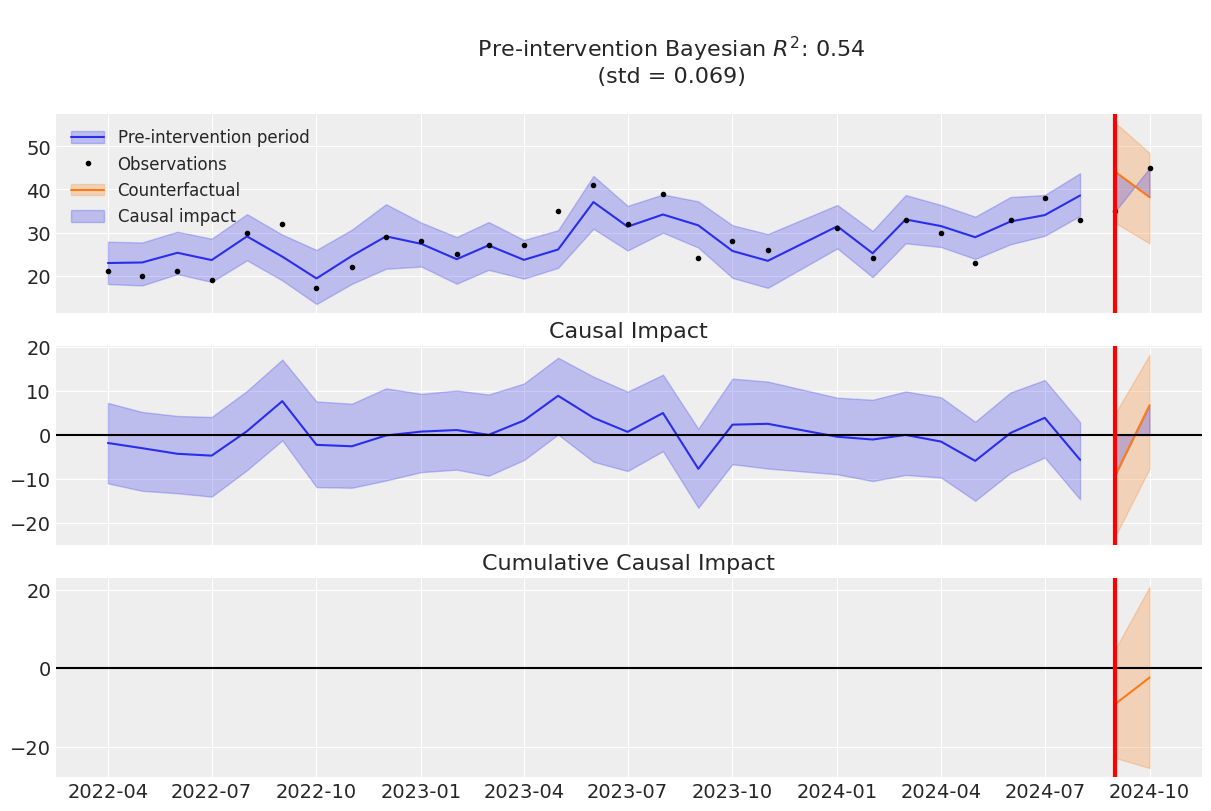

In [45]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

Causal Graph for San Francisco saved as San Francisco_plot.png


(0.0, 1.0, 0.0, 1.0)

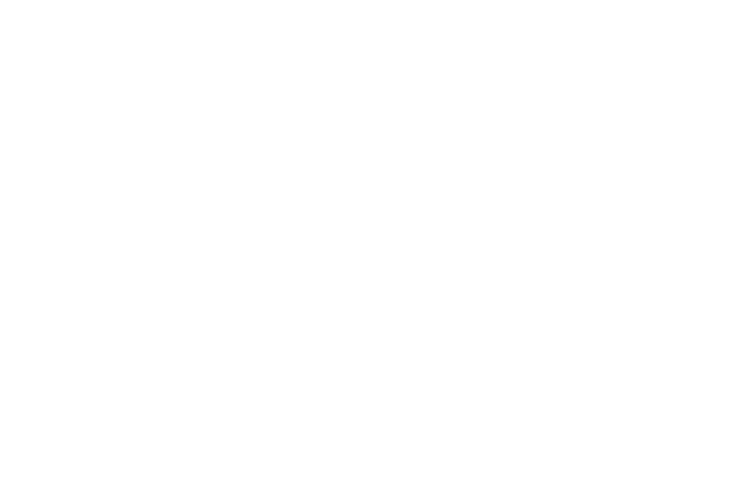

In [46]:
import matplotlib.image as mpimg



fig4.savefig(f"{MSA_MARKET}_causal_impact_plot.png")
plt.close()  # Close the figure to avoid overwriting
print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
plt.axis('off')  # Turn off axes for better visualization
# img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
# plt.imshow(img)

In [47]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [48]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 28)> Size: 896kB
array([[[26.04799005, 24.47207177, 27.27976771, ..., 32.5149127 ,
         36.7765741 , 35.97070227],
        [19.08435811, 24.49795847, 19.36118388, ..., 29.89638269,
         39.69443863, 38.7041517 ],
        [22.54356717, 28.18889869, 31.87643548, ..., 33.07213918,
         31.0715612 , 34.62604132],
        ...,
        [23.92601606, 28.19060639, 36.01890107, ..., 39.35475766,
         37.13930028, 38.58885991],
        [28.17326174, 22.69824513, 25.87962706, ..., 22.42198493,
         31.79798203, 38.58463499],
        [25.09245425, 26.48033814, 26.80765851, ..., 37.17481562,
         39.18385205, 40.97994519]],

       [[25.54337899, 25.36656745, 24.37625646, ..., 31.48051451,
         32.3665825 , 40.51682769],
        [17.35531441, 21.27739034, 22.77039406, ..., 31.92802352,
         36.73442518, 36.11893232],
        [19.85531789, 22.03259366, 29.54420255, ..., 32.66957429,
         32.70188055, 43.825

In [49]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 28)> Size: 896B
array([[22.62119094, 23.01459833, 25.09349698, 23.91606225, 29.17040724,
        24.36504445, 19.33179555, 24.5670289 , 29.35385234, 26.98214485,
        23.68359471, 26.84876634, 23.62524412, 26.07281837, 36.94927459,
        31.21331124, 34.00620663, 31.64693193, 25.61817979, 23.63954961,
        31.32742279, 24.87852778, 32.82125136, 31.45842419, 29.07541333,
        32.48394028, 34.11733271, 38.54963437],
       [22.93822504, 23.00773625, 25.22355122, 23.65268481, 29.36769467,
        24.45573186, 19.1792025 , 24.62426467, 29.15800763, 27.1972167 ,
        23.88634828, 27.21952042, 23.82884759, 26.18890399, 36.99748182,
        31.24806858, 34.22825863, 31.36649645, 25.73973111, 23.45675439,
        31.41204341, 24.9194569 , 33.13327262, 31.52532179, 28.72271993,
        32.7211528 , 34.15520523, 38.81371639],
       [22.85110937, 22.92737068, 25.20889143, 23.61931182, 29.31395674,
        24.31201616, 19.00453748, 24.56994284, 29.08552203, 27.51877221,
        23.90060985, 26.88611526, 23.58138811, 26.02119375, 37.2338733 ,
        31.32622267, 33.81430207, 31.97909503, 25.68359442, 23.31877895,
        31.70003429, 25.36165885, 33.04160168, 31.40158709, 28.83002288,
        32.34136596, 34.14144645, 38.72467053],
       [22.87833472, 23.05407175, 25.55639152, 23.56684544, 28.73104083,
        24.21871746, 19.45177273, 24.51817449, 28.86854163, 27.25108474,
        24.07287458, 26.98075102, 23.87030055, 26.19729355, 37.24697645,
        31.42896958, 34.07041455, 31.70283894, 25.62668081, 23.48914189,
        31.19598918, 24.98264016, 32.99635912, 31.62135578, 28.88104871,
        32.62670303, 34.06390529, 38.43668738]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 224B 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27

In [50]:
import arviz as az

az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,28.126,1.079,26.134,30.125,0.017,0.012,3980.0,3504.0,1.0


In [51]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,6.772,6.695,-7.552,18.156,0.124,0.093,2904.0,3279.0,1.0


In [52]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-2.372,12.286,-22.358,17.316,0.258,0.183,2259.0,2502.0,1.0


In [53]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [54]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [55]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
26,2024-06-01,33,False,36,6,9393,0.00,1,0
27,2024-07-01,38,False,37,7,9695,0.00,8,0
28,2024-08-01,33,False,38,8,9455,0.00,3,0
29,2024-09-01,35,True,39,9,11213,38.43,8,5
30,2024-10-01,45,True,40,10,9971,38.52,8,4


In [56]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,35,San Francisco,0
1,2024-10-01,45,San Francisco,1


In [57]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_5435/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-09-01 00:00:00')

In [58]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-09-01,San Francisco,35,44.109,-9.109,7.380,-0.2065,False,-21.987,2.460,0.154,0.109
1,1,2024-10-01,San Francisco,45,38.263,6.737,6.721,0.1761,False,-4.740,17.434,0.124,0.094


In [59]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [60]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [61]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,35,San Francisco,0
1,2024-10-01,45,San Francisco,1


In [62]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [63]:
result

,index,year_month,io_count
0,treatment_start,2024-09-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,80.0


In [64]:
int_dates['io_count'].sum()

80

In [65]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-2.372,12.286,-22.358,17.316,0.258,0.183,2259.0,2502.0,1.0


In [66]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,San Francisco,2024-09-01,2024-10-01,80,82.372,-2.372,12.286,-0.0288,False,-22.358,17.316,0.258,0.183


In [67]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)